## General Analysis

How many unique employees are there in the data?
What is the age distribution of employees?
What is the number of employees by gender?
Distribution of employees by functional divisions?
Distribution of employees by education level?


## Salary Analysis
What is the average, highest and lowest salary for employees?
How does the average salary vary by functional divisions?
How does education level affect the average salary?
Performance and Training Analysis
How does the number of training opportunities relate to the number of courses taken?
Is there a relationship between self-evaluation and manager evaluation?
Distribution of job satisfaction ratings, environment, work and life?
Relationship satisfaction versus manager evaluation?

## Attrition Analysis
What is the percentage of employees leaving the company?
What is the relationship between employee departure and age?
Is there a relationship between distance from home and the rate of departure?
How does overtime affect the rate of departure?
Is there a difference in the rate of departure between divisions?
Seniority and Promotion Analysis
What is the average number of years employees have been with the company?
How does the number of years since the last promotion affect the rate of departure?
Analysis of years of experience with the same manager and its impact on performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("FinalProject.csv")

In [3]:
df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome_KM,State,Ethnicity,...,EducationLevel,ReviewDate,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,manager_rating,self_rating,Relationship_Satisfaction_rating,Job_Satisfaction_rating,Work_Life_Balance,Environment_Satisfaction
0,005C-E0FB,Fin,O'Halleghane,Non-Binary,24,Frequent Traveller,Sales,17,CA,White,...,Masters,2020-06-17,1,2,Meets Expectation,Exceeds Expectation,Dissatisfied,Neutral,Dissatisfied,Neutral
1,005C-E0FB,Fin,O'Halleghane,Non-Binary,24,Frequent Traveller,Sales,17,CA,White,...,Masters,2021-06-17,1,1,Meets Expectation,Meets Expectation,Very Satisfied,Satisfied,Very Satisfied,Satisfied
2,005C-E0FB,Fin,O'Halleghane,Non-Binary,24,Frequent Traveller,Sales,17,CA,White,...,Masters,2022-06-17,3,0,Exceeds Expectation,Exceeds Expectation,Very Satisfied,Satisfied,Satisfied,Neutral
3,00A3-2445,Wyatt,Ziehm,Male,30,Some Travel,Technology,6,CA,Black or African American,...,High School,2022-06-18,1,2,Exceeds Expectation,Exceeds Expectation,Very Satisfied,Very Satisfied,Satisfied,Satisfied
4,00A3-2445,Wyatt,Ziehm,Male,30,Some Travel,Technology,6,CA,Black or African American,...,High School,2015-06-20,3,1,Meets Expectation,Meets Expectation,Satisfied,Neutral,Dissatisfied,Neutral


In [4]:
##Number of unique employees
num_em = df["EmployeeID"].nunique()
print(f"Number unique employees : {num_em} ")

Number unique employees : 1280 


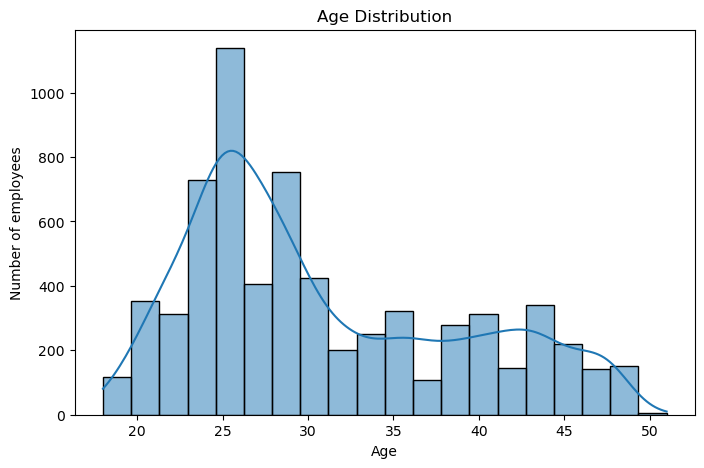

In [5]:
## Age Distribution of Employees
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of employees")
plt.show()

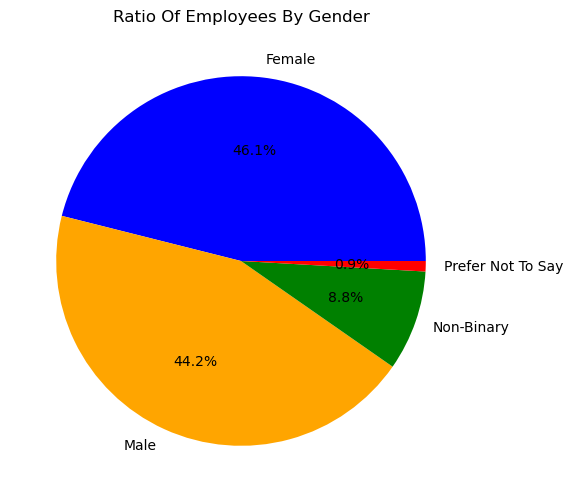

In [6]:
##Number of employees by gender
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct="%1.1f%%",colors=['blue','orange','green','red'])
plt.title("Ratio Of Employees By Gender")
plt.show()

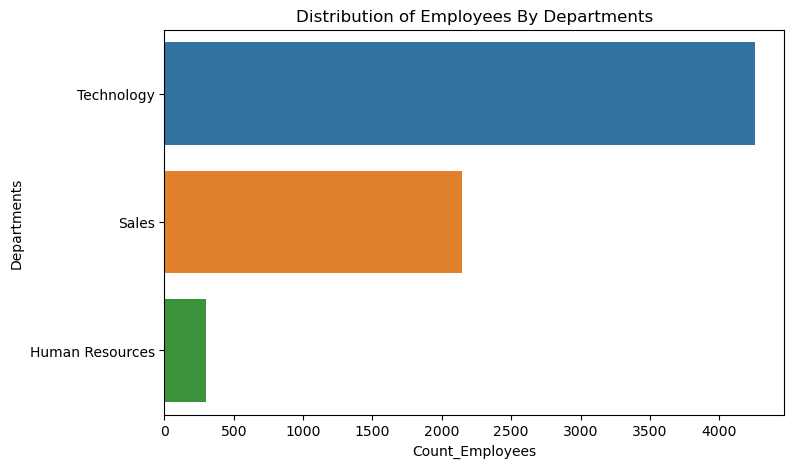

In [7]:
##Distribution of employees by departments
plt.figure(figsize=(8,5))
sns.countplot(y =df['Department'],order=df['Department'].value_counts().index)
plt.title("Distribution of Employees By Departments")
plt.xlabel("Count_Employees")
plt.ylabel("Departments")
plt.show()

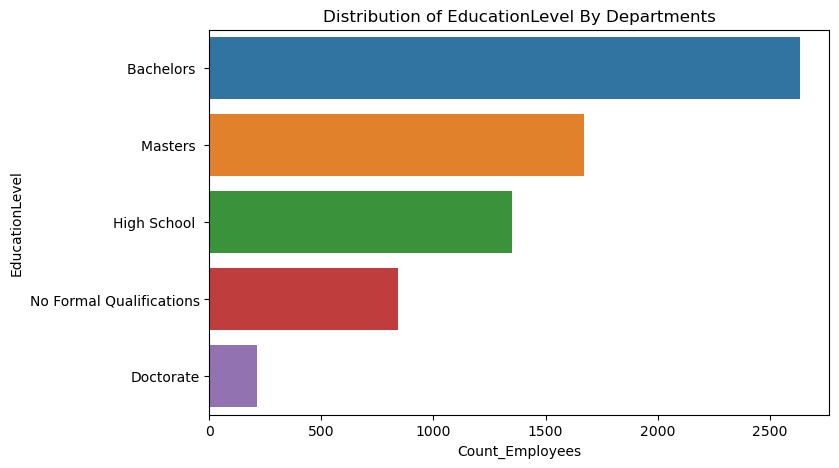

In [8]:
##Distribution of employees by EducationLevel
plt.figure(figsize=(8,5))
sns.countplot(y =df['EducationLevel'],order=df['EducationLevel'].value_counts().index)
plt.title("Distribution of EducationLevel By Departments")
plt.xlabel("Count_Employees")
plt.ylabel("EducationLevel")
plt.show()

In [9]:
##Salary Statistics
df['Salary'].describe()

count      6709.000000
mean     111061.747951
std       98267.955572
min       20387.000000
25%       45276.000000
50%       75667.000000
75%      137427.000000
max      547204.000000
Name: Salary, dtype: float64

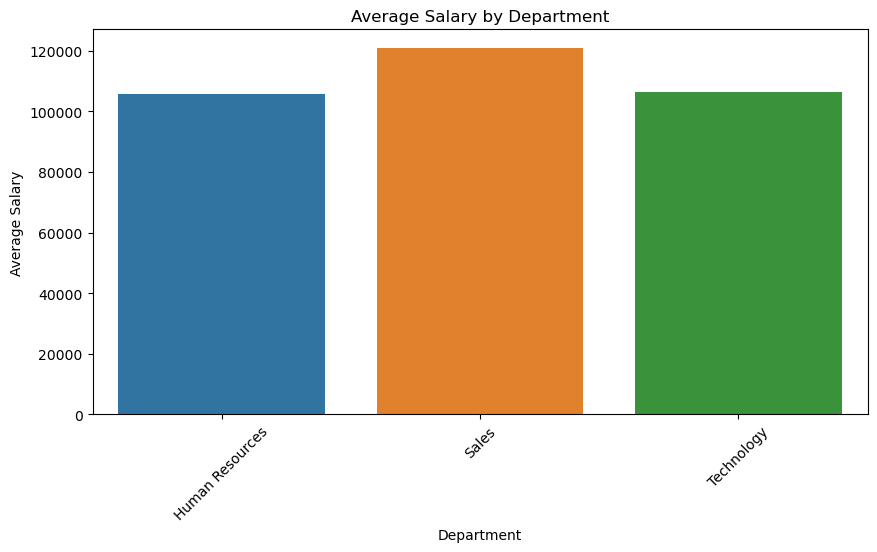

In [10]:
##Average Salary by Department
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('Department')['Salary'].mean().index, y=df.groupby('Department')['Salary'].mean().values)
plt.title("Average Salary by Department")
plt.xticks(rotation=45)
plt.ylabel("Average Salary")
plt.show()

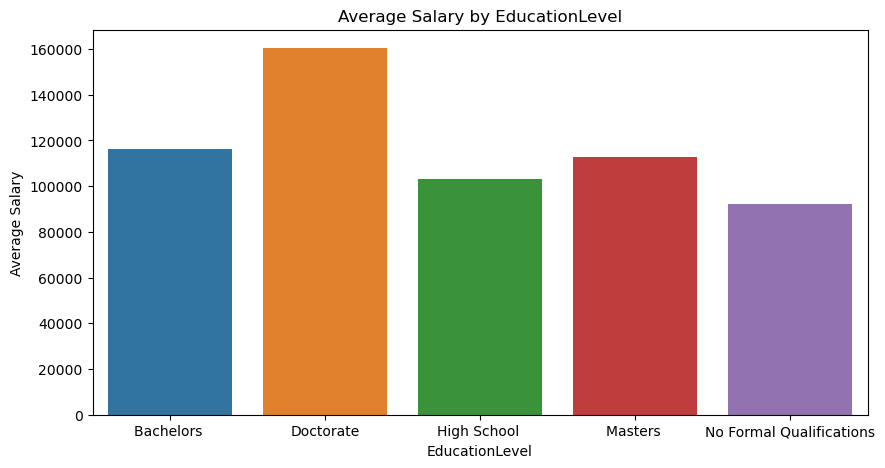

In [11]:
##The effect of education level on average salary
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('EducationLevel')['Salary'].mean().index, y=df.groupby('EducationLevel')['Salary'].mean().values)
plt.title("Average Salary by EducationLevel")
plt.xlabel("EducationLevel")
plt.ylabel("Average Salary")
plt.show()

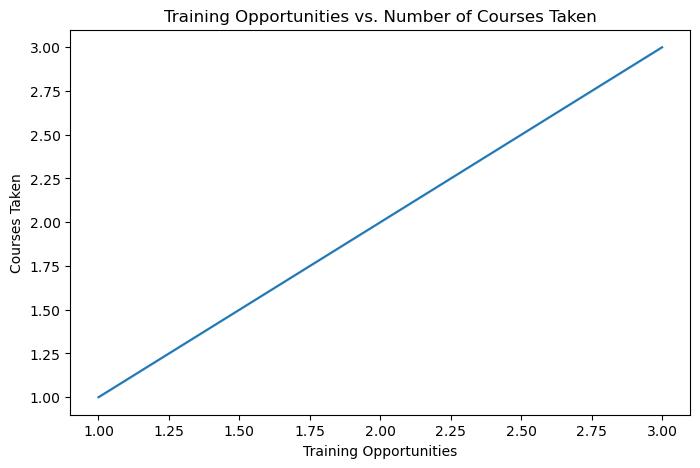

In [12]:
plt.figure(figsize=(8,5))
sns.lineplot(x =df['TrainingOpportunitiesWithinYear'],y=df['TrainingOpportunitiesWithinYear'])
plt.title("Training Opportunities vs. Number of Courses Taken")
plt.xlabel("Training Opportunities")
plt.ylabel("Courses Taken")
plt.show()

In [14]:

attrition_rate = df['Attrition'].mean() * 100
print(f"Attrition_Rate : {attrition_rate:.2f}%")

Attrition_Rate : 33.70%


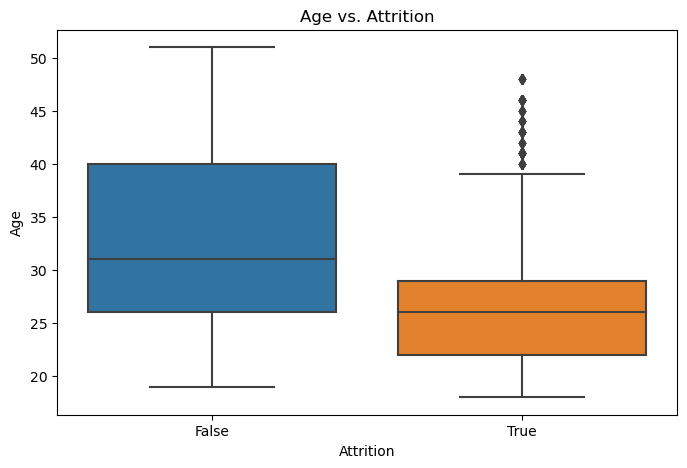

In [15]:
##the relationship Age vs. Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Attrition'], y=df['Age'])
plt.title("Age vs. Attrition")
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.show()

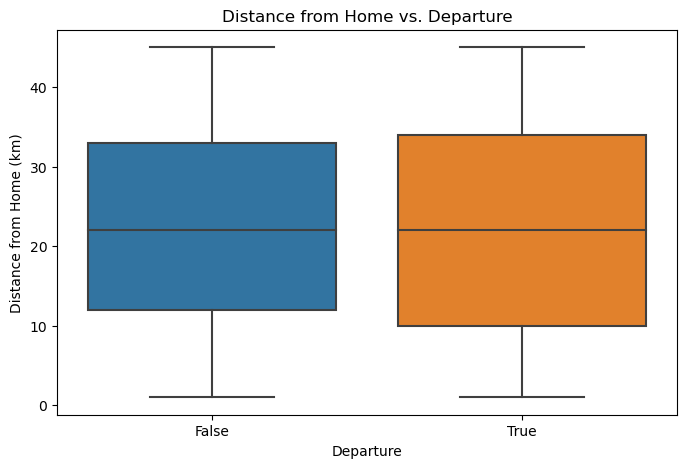

In [16]:
# Effect of distance from home on departure rate
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Attrition'], y=df['DistanceFromHome_KM'])
plt.title("Distance from Home vs. Departure")
plt.xlabel("Departure")
plt.ylabel("Distance from Home (km)")
plt.show()

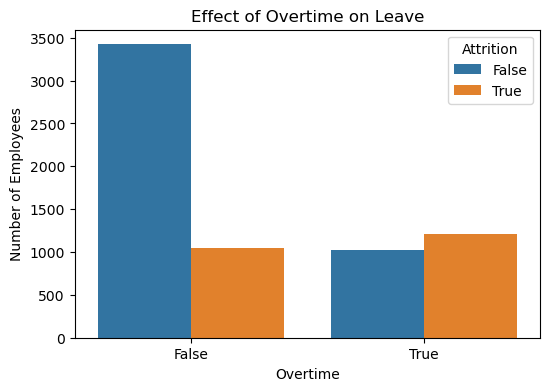

In [17]:
##The effect of overtime on leaving
plt.figure(figsize=(6, 4))
sns.countplot(x=df['OverTime'], hue=df['Attrition'])
plt.title("Effect of Overtime on Leave")
plt.xlabel("Overtime")
plt.ylabel("Number of Employees")
plt.show()

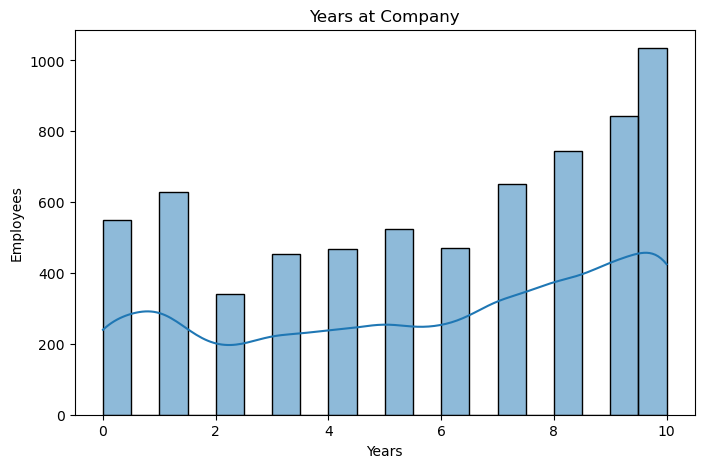

In [18]:
##Analysis of years of work in the company
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsAtCompany'], bins=20, kde=True)
plt.title("Years at Company")
plt.xlabel("Years")
plt.ylabel("Employees")
plt.show()

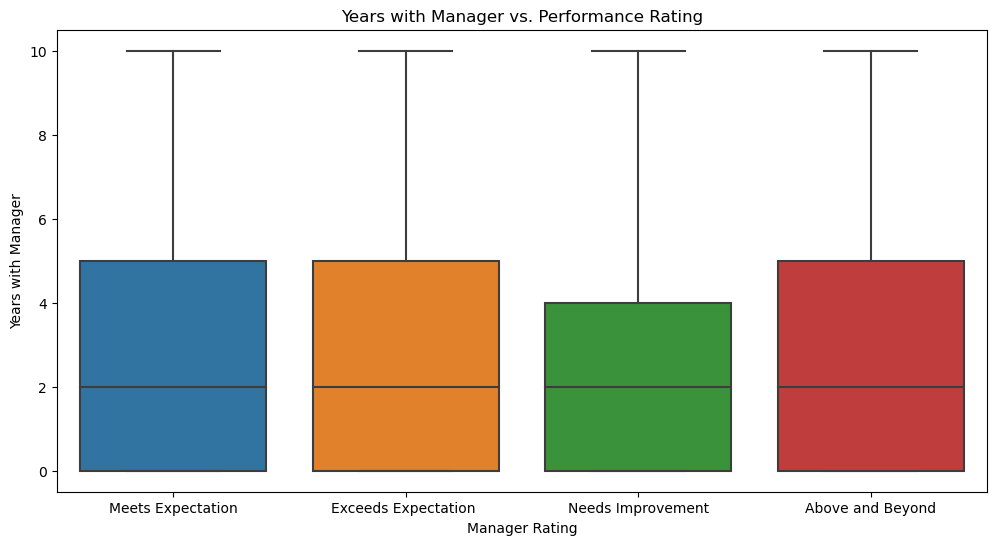

In [19]:
##Analyze years of experience with the manager and its impact on performance
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['manager_rating'], y=df['YearsWithCurrManager'])
plt.title("Years with Manager vs. Performance Rating")
plt.xlabel("Manager Rating")
plt.ylabel("Years with Manager")
plt.show()